### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [30]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv("../data/usuarios_win_mac_lin.csv")
df.head()

duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2

In [23]:
# Defining X and Y Variables
X = np.array(df.drop(['duracion'], 1))
y = np.array(df['duracion'].astype('int'))
X.shape

(170, 4)

In [26]:
# Splitting Data into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=13)

In [27]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
predictions = model.predict(X_test)
print(predictions)

[12 12 12  1 13  1 12 13 12 13 11  1 13 13 12  1 12 11  1  1 13 11 13 12
 12 11 12 13 12 11  1 12 12 13]


# Score

In [33]:
model.score(X_train, y_train)

0.22794117647058823

El score de 0.22 no es demasiado buen indicador de la prediccion del modelo

# RMSE

In [35]:
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)

MAE: 121.41176470588235
MSE: 64686.294117647056
RMSE: 254.33500372077583


Tenemos un RMSE de 254.33, que si apunta a ser mas alto de lo que deberia ser

# Correlations

<AxesSubplot:>

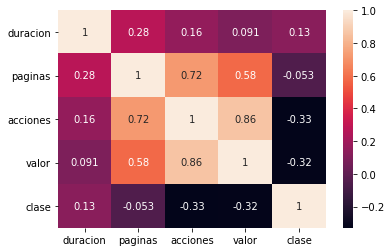

In [20]:
sns.heatmap(df.corr(), annot=True)

La matriz de correlacion indica que no hay ninguna columna correlacionada con la duracion, por lo tanto es normal que la prediccion haya sido tan mala

# Es la regresion multinomial buen metodo para este dataset?

No, la columna duracion es una variable continua y numerica que no representa valores categoricos y estamos aplicando un modelo de prediccion de clasificacion a valores categoricos. Lo mas apto para este tipo de problema seria un modeloo de regresion como la lineal

# Confusion Matrix

In [39]:
confusion_matrix(y_test, predictions)

array([[2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
# Resolviendolo con regresiones lineales
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)
print('Score:', lin_reg.score(X_train, y_train))

Score: 0.09366444477807156
